# Problem 1:

## Clustering:

### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


In [611]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [613]:
df1 = pd.read_excel('Clustering_Clean_ads_data.xlsx')

In [614]:
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [615]:
df1.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [616]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [617]:
df1.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [618]:
df1.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [619]:
df1.Platform.value_counts()

Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64

In [620]:
df1.Format.value_counts()

Format
Video      11552
Display    11514
Name: count, dtype: int64

In [621]:
df1.InventoryType.value_counts()

InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64

In [622]:
df1.duplicated().sum()

0

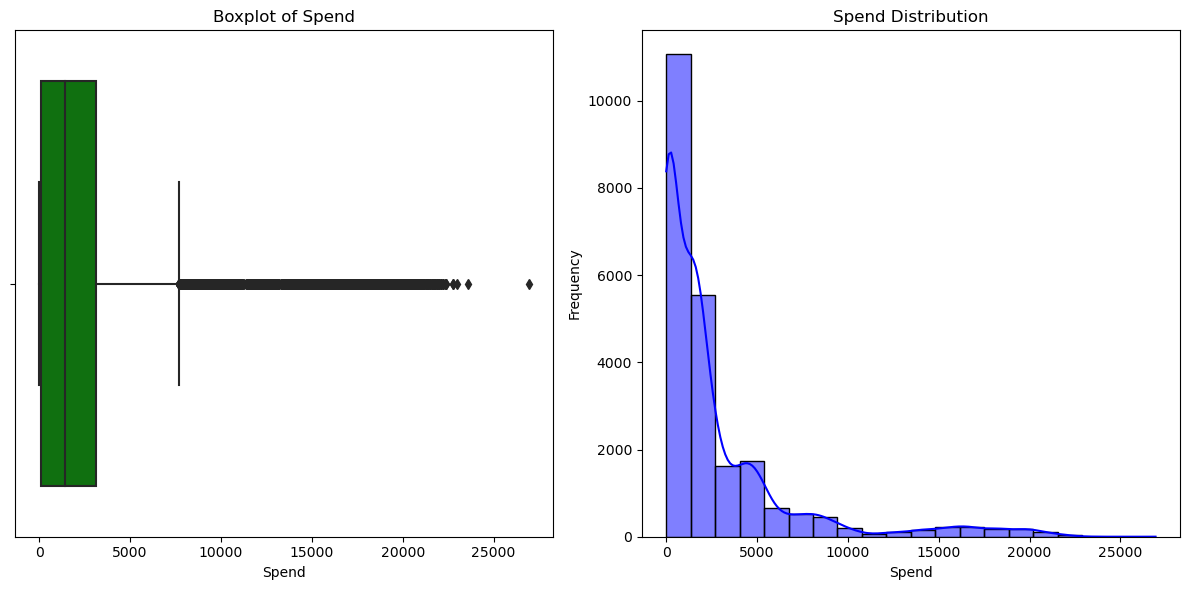

In [623]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df1, x='Spend', color='green', ax=display[0])
display[0].set_title('Boxplot of Spend')
display[0].set_xlabel('Spend')

sns.histplot(df1['Spend'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Spend Distribution')
display[1].set_xlabel('Spend')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

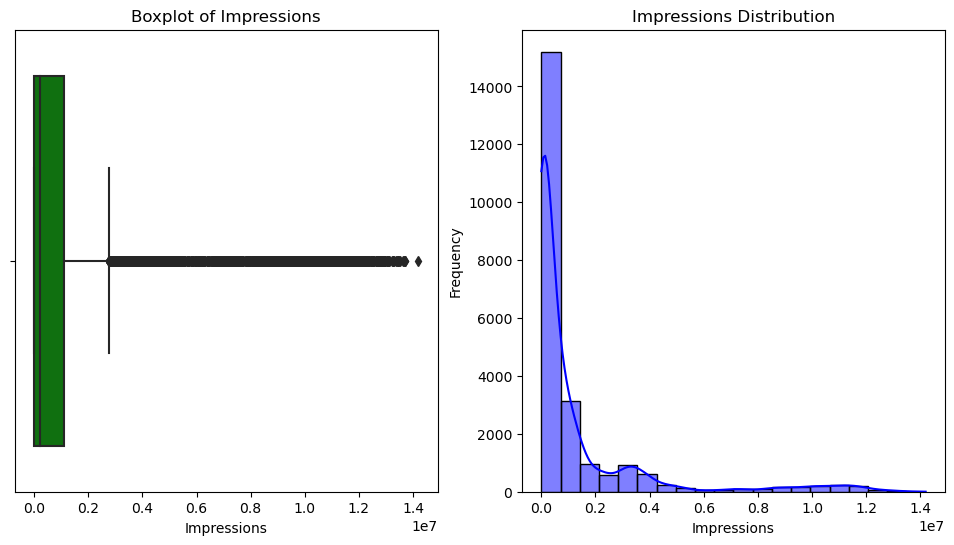

In [624]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df1, x='Impressions', color='green', ax=display[0])
display[0].set_title('Boxplot of Impressions')
display[0].set_xlabel('Impressions')

sns.histplot(df1['Impressions'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Impressions Distribution')
display[1].set_xlabel('Impressions')
display[1].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

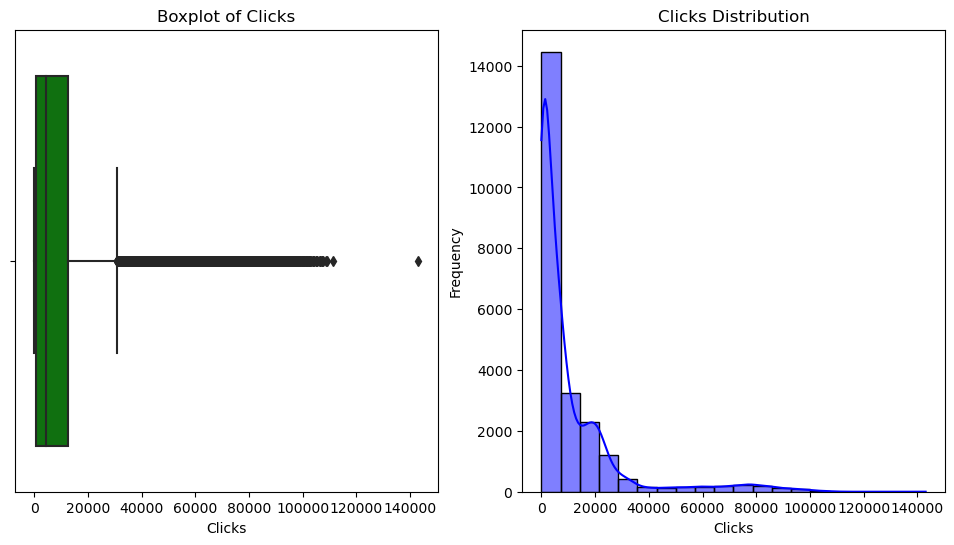

In [625]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df1, x='Clicks', color='green', ax=display[0])
display[0].set_title('Boxplot of Clicks')
display[0].set_xlabel('Clicks')

sns.histplot(df1['Clicks'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Clicks Distribution')
display[1].set_xlabel('Clicks')
display[1].set_ylabel('Frequency')

# Bivariate analysis

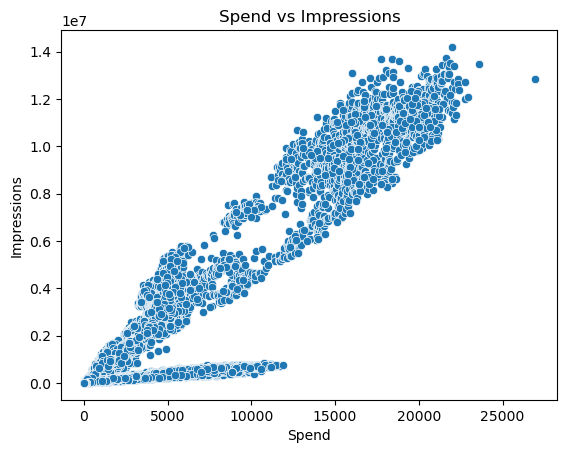

In [632]:

sns.scatterplot(x='Spend', y='Impressions', data=df1)
plt.title('Spend vs Impressions')
plt.show()

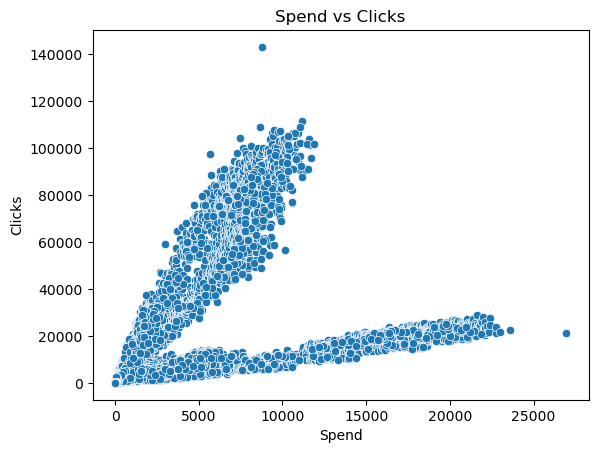

In [638]:

sns.scatterplot(x='Spend', y='Clicks', data=df1)
plt.title('Spend vs Clicks')
plt.show()


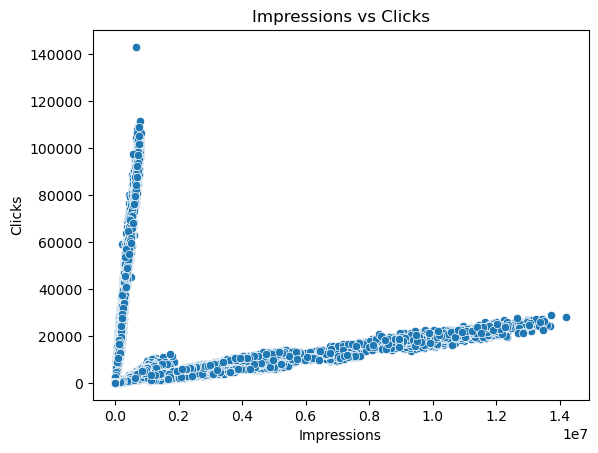

In [640]:
sns.scatterplot(x='Impressions', y='Clicks', data=df1)
plt.title('Impressions vs Clicks')
plt.show()

In [642]:
def calculate_CPM(row):
    try:
        return (row['Spend'] / row['Impressions']) * 1000
    except ZeroDivisionError:
        return None

def calculate_CPC(row):
    try:
        return row['Spend'] / row['Clicks']
    except ZeroDivisionError:
        return None

def calculate_CTR(row):
    try:
        return (row['Clicks'] / row['Impressions']) * 100
    except ZeroDivisionError:
        return None

def impute_values(df1):
    df1['CPM'] = df1.apply(lambda row: calculate_CPM(row) if pd.isnull(row['CPM']) else row['CPM'], axis=1)
    df1['CPC'] = df1.apply(lambda row: calculate_CPC(row) if pd.isnull(row['CPC']) else row['CPC'], axis=1)
    df1['CTR'] = df1.apply(lambda row: calculate_CTR(row) if pd.isnull(row['CTR']) else row['CTR'], axis=1)
    return df1

# Impute missing values
df1 = impute_values(df1)

# Verify if there are any remaining null values
df1.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [643]:
def detect_outliers(df1, features):
    outliers = {}
    for feature in features:
        Q1 = np.percentile(df1[feature], 25)
        Q3 = np.percentile(df1[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)].index
    return outliers

features = ['CPM', 'CPC', 'CTR']
outliers = detect_outliers(df1, features)

# Decide whether to treat outliers
outliers

{'CPM': Index([  160,   204,   227,   250,   281,   285,   292,   319,   349,   384,
        ...
        23055, 23056, 23057, 23058, 23059, 23060, 23061, 23063, 23064, 23065],
       dtype='int64', length=208),
 'CPC': Index([  342,   346,   355,   356,   369,   376,  1440,  2032,  2899,  8434,
        ...
        21528, 21541, 21573, 21811, 21813, 21825, 21826, 21846, 21869, 23047],
       dtype='int64', length=568),
 'CTR': Index([   72,    79,    80,    83,    90,    94,    98,    99,   160,   204,
        ...
        23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065],
       dtype='int64', length=3487)}

### K-Means is sensitive to outliers because it uses the mean to calculate the centroid of each cluster. Outliers can pull the centroid away from the true center of the cluster, leading to poor clustering results. So we have decided to not treat the outliers as there are too many of them

In [651]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1[['CPM', 'CPC', 'CTR']])

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=['CPM', 'CPC', 'CTR'])

In [655]:
data_scaled

,CPM,CPC,CTR
0,-0.927110,-0.986603,-0.332572
1,-0.927110,-0.986603,-0.332521
2,-0.927110,-0.986603,-0.332610
3,-0.927110,-0.986603,-0.332712
4,-0.927110,-0.986603,-0.332444
...,...,...,...
23061,6.801816,-0.781459,12.400641
23062,1.281155,-0.869378,6.033837
23063,4.593551,-0.840072,12.400641
23064,6.801816,-0.781459,12.400641


In [347]:
data_scaled.isna().sum()

CPM    0
CPC    0
CTR    0
dtype: int64

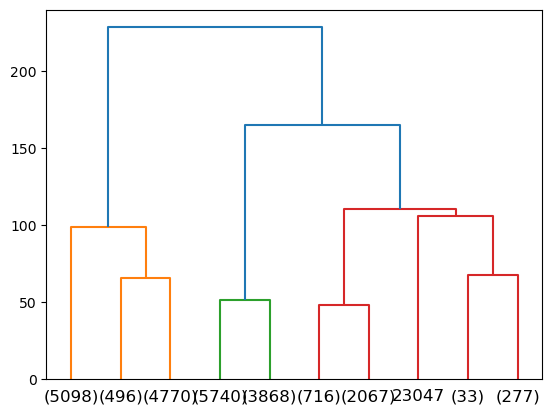

In [349]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(data_scaled, method = 'ward')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,)

In [351]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow plot
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)

In [352]:
kmeans.inertia_

5547.008879508678

In [355]:
kmeans.labels_

array([9, 9, 9, ..., 7, 7, 2])

In [357]:
wss

[69198.00000000006,
 43022.667076589845,
 28839.69619057704,
 22651.370846979597,
 17217.73200552396,
 12388.010795247194,
 10228.892745807889,
 8089.458500719217,
 6701.792433048136,
 5547.008879508678]

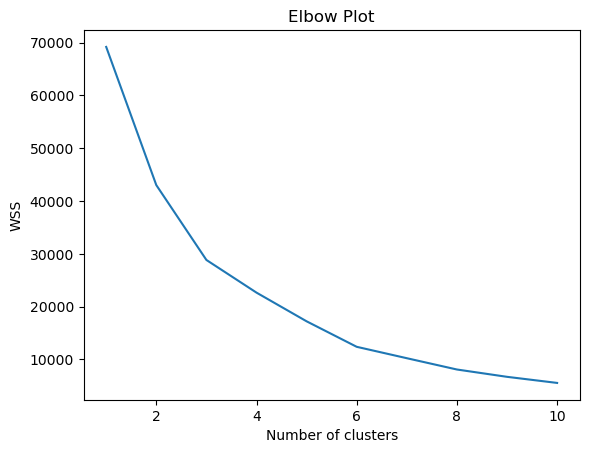

In [359]:
plt.plot(range(1, 11), wss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [361]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

In [362]:
silhouette_scores

[0.5231204994359623,
 0.5733734624439143,
 0.5930413256947724,
 0.5965649588555965,
 0.574563273876748,
 0.5778925624534481,
 0.5898645726326806,
 0.549952572664179,
 0.5534277426173733]

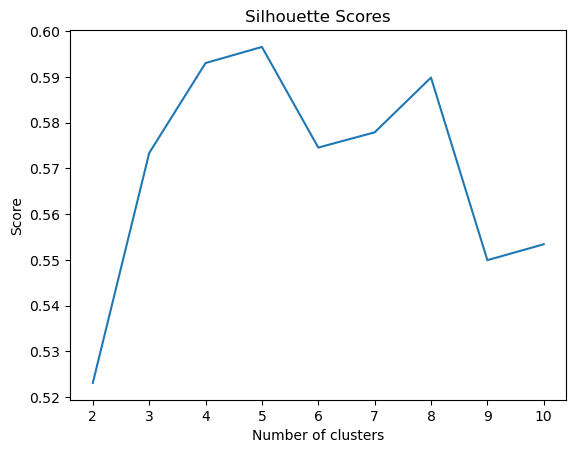

In [365]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [367]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters: {optimal_clusters}')

Optimal number of clusters: 5


In [369]:
# Choose the optimum number of clusters based on silhouette score
optimal_clusters = 5  # Example, needs to be determined from the plot

kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled)

# Profile the clusters
cluster_profile = data_scaled.groupby('Cluster').mean()
print(cluster_profile)



               CPM       CPC       CTR
Cluster                               
0         0.675495 -0.719918  1.834613
1        -0.734463  0.906174 -0.326313
2         0.468674 -0.693751 -0.305138
3         4.010756 -0.737435  6.756105
4        78.018351  3.204196  6.033837


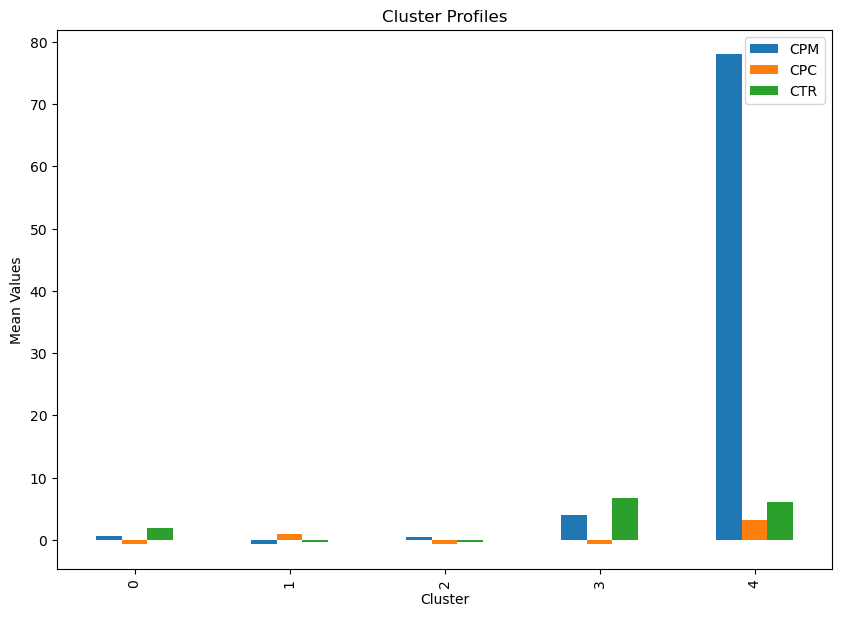

In [657]:
# Visualize cluster profiles
cluster_profile[['CPM', 'CPC', 'CTR']].plot(kind='bar', figsize=(10, 7))
plt.title('Cluster Profiles')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.legend(loc='best')
plt.show()


Cluster Interpretation
Cluster 0:

CPM (Cost Per Thousand Impressions): Slightly above average
CPC (Cost Per Click): Below average
CTR (Click-Through Rate): Significantly above average
Insight: These ads have a relatively high engagement rate at a lower cost per click. They are cost-efficient in driving clicks.
Cluster 1:

CPM: Below average
CPC: Above average
CTR: Below average
Insight: These ads are cheaper per thousand impressions but more expensive per click and have a lower engagement rate. They are less effective in generating clicks.
Cluster 2:

CPM: Slightly above average
CPC: Below average
CTR: Below average
Insight: These ads have average costs with below-average engagement rates. They may need optimization to improve performance.
Cluster 3:

CPM: Significantly above average
CPC: Below average
CTR: Significantly above average
Insight: These ads have high costs but also very high engagement rates, making them highly effective despite the high CPM.
Cluster 4:

CPM: Extremely high
CPC: Very high
CTR: Very high
Insight: These ads are extremely expensive but also drive high engagement. These could be premium ad placements that yield strong results despite their high cost.
Recommendations
Optimize Ads in Cluster 0:

These ads are performing well with high engagement rates and low cost per click. Maintain these ads and use them as a benchmark for other campaigns.
Replicate the strategies used for these ads in other clusters to improve overall performance.
Improve Ads in Cluster 1:

These ads have low engagement and high cost per click. Consider revising the ad creatives, target audience, or overall strategy.
Test different variations and optimize the elements that are underperforming.
Monitor Ads in Cluster 2:

These ads are average in cost and engagement. Regularly monitor these ads and make incremental changes to improve their performance.
Conduct A/B testing to identify effective changes.
Leverage High-Performing Ads in Cluster 3:

These ads are very effective in driving engagement. Ensure that the high cost is justified by the return on investment.
Use these ads as a model for creating new high-engagement ads.
Evaluate Ads in Cluster 4:

These ads are extremely expensive but also drive significant engagement. Assess whether the high cost is sustainable and justified.
Negotiate better rates or optimize placements to reduce CPM while maintaining high CTR.
Additional Actionable Steps
Segment by Device Type: Further analyze the performance of ads within each cluster by device type (e.g., mobile, desktop) to understand which devices drive the most engagement. This can help optimize ad spend accordingly.

Continuous Monitoring and Adjustment: Regularly monitor the performance of ads within each cluster. Adjust strategies based on real-time data to ensure optimal performance.

Budget Reallocation: Allocate more budget to ads in Clusters 0 and 3, which are performing well, and reduce the budget for ads in Clusters 1 and 2 until improvements are identified. Consider whether the high costs of Cluster 4 are justified and if so, maintain or slightly reduce the budget for these premium ads.

In [374]:
kmeans = KMeans(n_clusters=optimal_clusters).fit(df1[['CPM', 'CPC', 'CTR']])
df1['Cluster'] = kmeans.labels_
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,0


# PROBLEM 2 PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

In [209]:
df2 = pd.read_excel('PCA_India_Data_Census.xlsx')

In [211]:
print("Shape of the dataset:", df2.shape)


Shape of the dataset: (640, 61)


In [213]:
df2.dtypes

State Code        int64
Dist.Code         int64
State            object
Area Name        object
No_HH             int64
                  ...  
MARG_HH_0_3_F     int64
MARG_OT_0_3_M     int64
MARG_OT_0_3_F     int64
NON_WORK_M        int64
NON_WORK_F        int64
Length: 61, dtype: object

In [215]:
df2.describe()


,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [217]:
df2.head()


,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [219]:
df2.tail()


,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [277]:
df2.State.value_counts()

State
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
La

# Univariate analysis

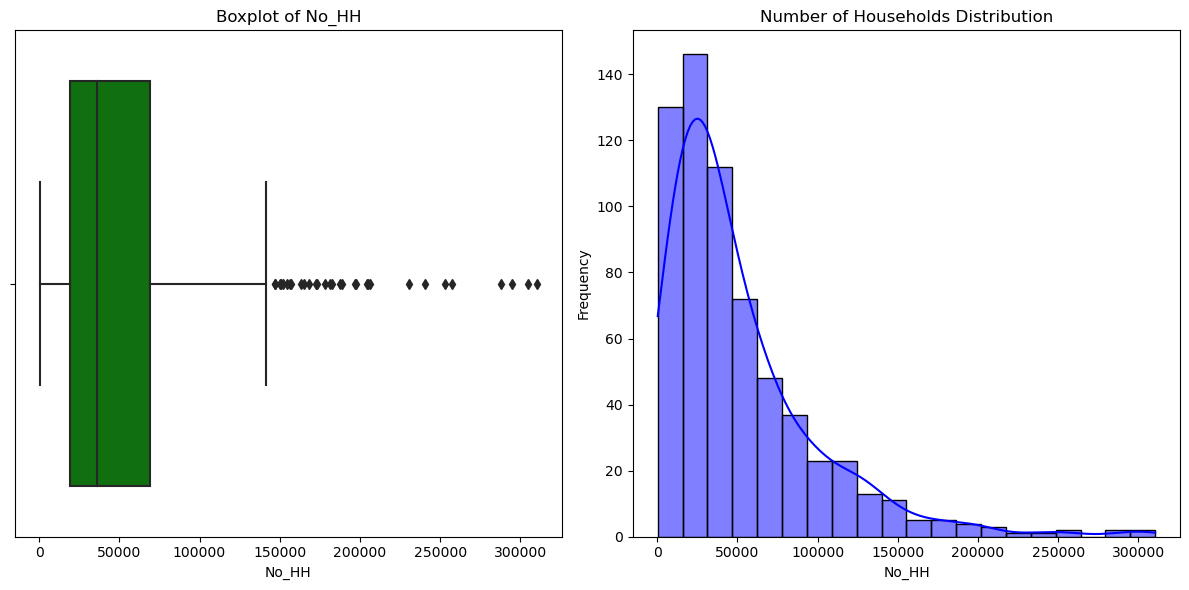

In [241]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2, x='No_HH', color='green', ax=display[0])
display[0].set_title('Boxplot of No_HH')
display[0].set_xlabel('No_HH')

sns.histplot(df2['No_HH'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Number of Households Distribution')
display[1].set_xlabel('No_HH')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


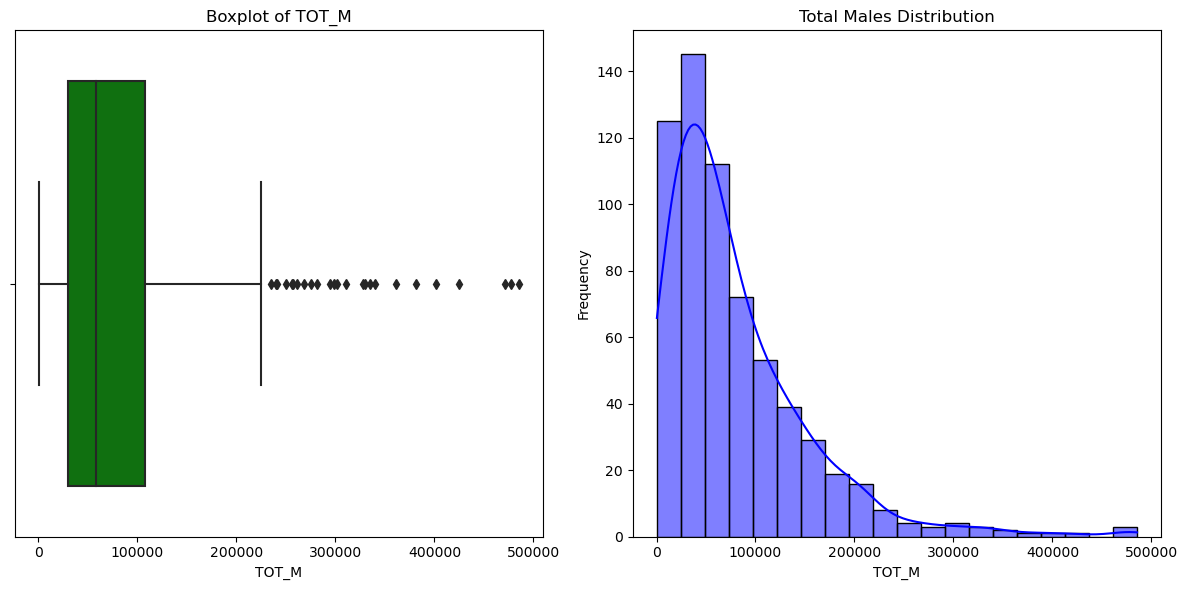

In [249]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2, x='TOT_M', color='green', ax=display[0])
display[0].set_title('Boxplot of TOT_M')
display[0].set_xlabel('TOT_M')

sns.histplot(df2['TOT_M'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Total Males Distribution')
display[1].set_xlabel('TOT_M')
display[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

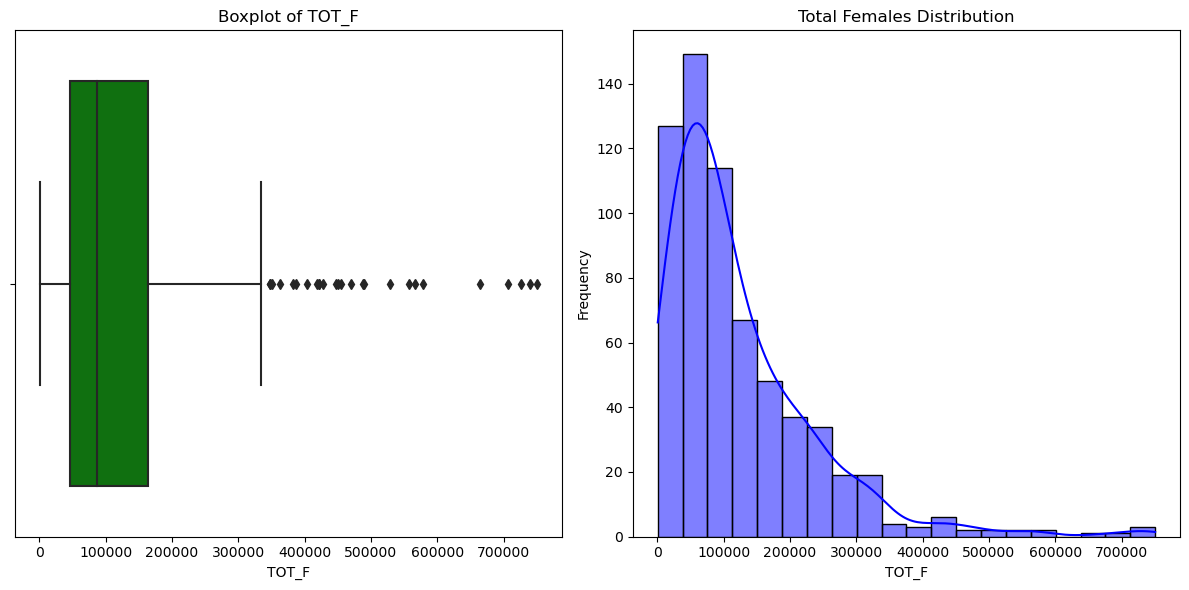

In [251]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2, x='TOT_F', color='green', ax=display[0])
display[0].set_title('Boxplot of TOT_F')
display[0].set_xlabel('TOT_F')

sns.histplot(df2['TOT_F'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Total Females Distribution')
display[1].set_xlabel('TOT_F')
display[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

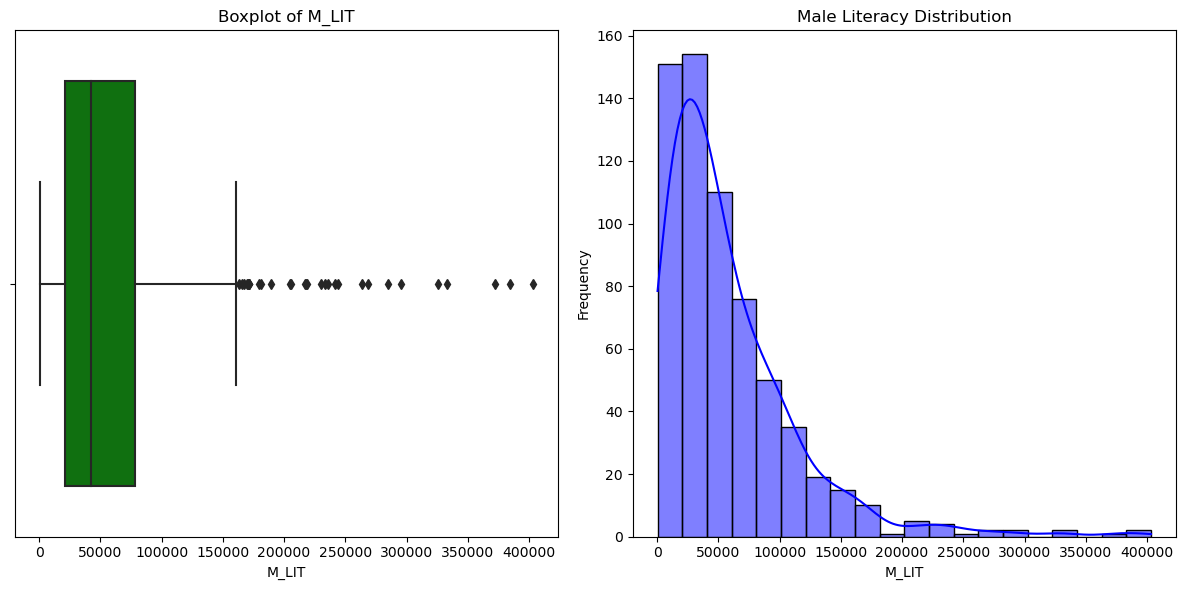

In [253]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2, x='M_LIT', color='green', ax=display[0])
display[0].set_title('Boxplot of M_LIT')
display[0].set_xlabel('M_LIT')

sns.histplot(df2['M_LIT'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Male Literacy Distribution')
display[1].set_xlabel('M_LIT')
display[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

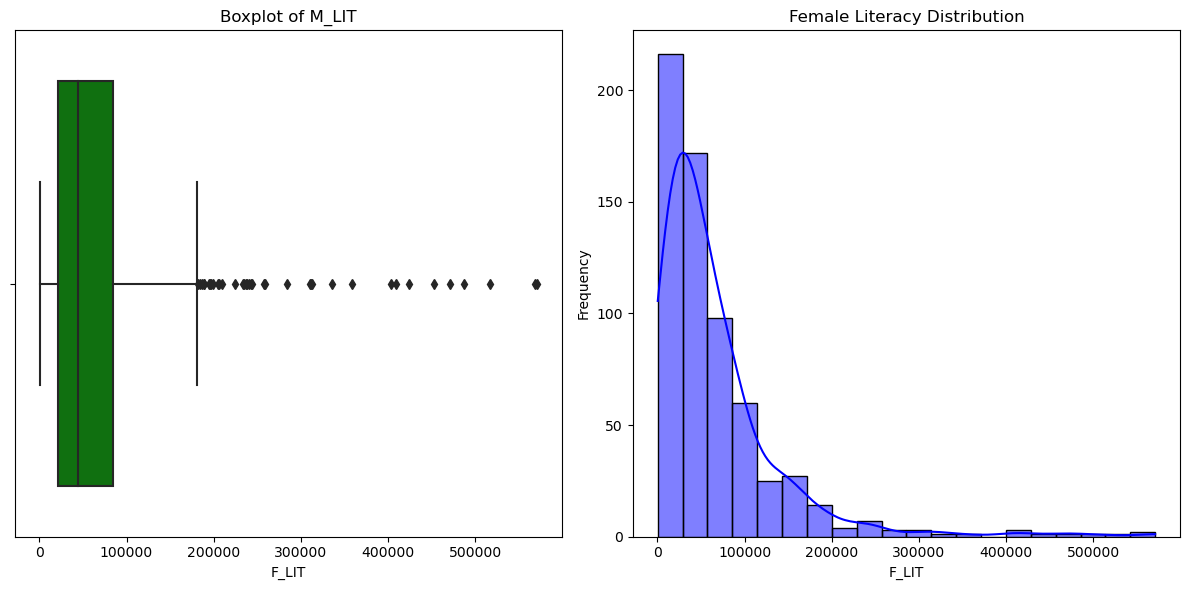

In [255]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2, x='F_LIT', color='green', ax=display[0])
display[0].set_title('Boxplot of M_LIT')
display[0].set_xlabel('F_LIT')

sns.histplot(df2['F_LIT'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Female Literacy Distribution')
display[1].set_xlabel('F_LIT')
display[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Bivariate analysis

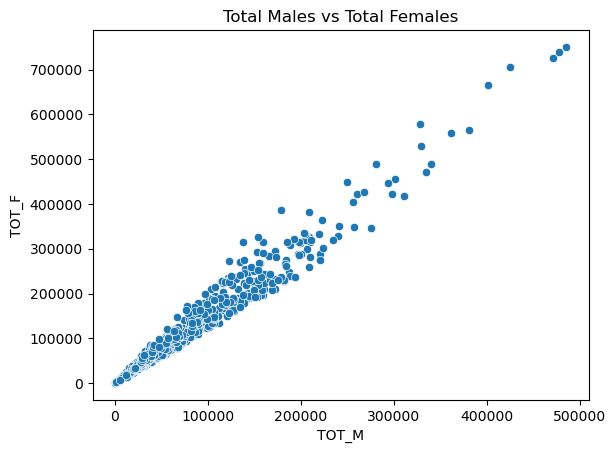

In [160]:
sns.scatterplot(x='TOT_M', y='TOT_F', data=df2)
plt.title('Total Males vs Total Females')
plt.show()

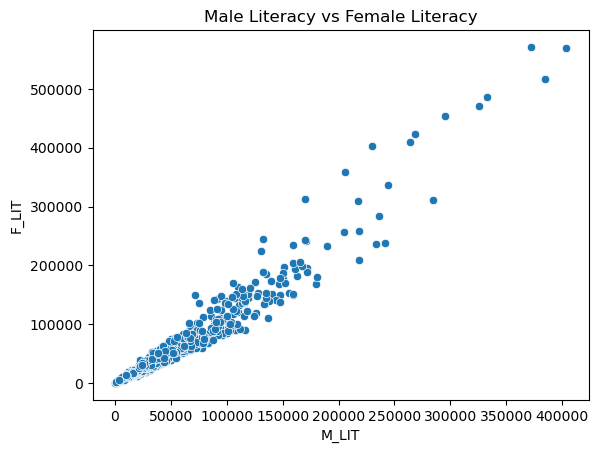

In [162]:
sns.scatterplot(x='M_LIT', y='F_LIT', data=df2)
plt.title('Male Literacy vs Female Literacy')
plt.show()

In [173]:

corr = df2[['No_HH', 'TOT_M', 'TOT_F', 'M_LIT', 'F_LIT']].corr()
corr

,No_HH,TOT_M,TOT_F,M_LIT,F_LIT
No_HH,1.000000,0.916170,0.970590,0.931938,0.928087
TOT_M,0.916170,1.000000,0.982640,0.989312,0.931708
TOT_F,0.970590,0.982640,1.000000,0.985441,0.957012
M_LIT,0.931938,0.989312,0.985441,1.000000,0.967956
F_LIT,0.928087,0.931708,0.957012,0.967956,1.000000


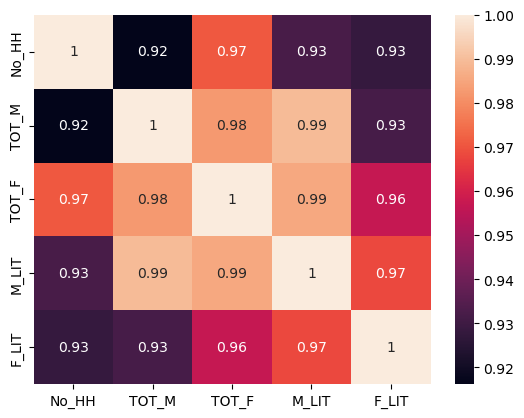

In [175]:
sns.heatmap(corr, annot=True);

### 4. Example Questions
### Which state has the highest and lowest gender ratio?


In [179]:
df2['Gender_Ratio'] = df2['TOT_F'] / df2['TOT_M']
highest_ratio_state = df2['Gender_Ratio'].idxmax()
lowest_ratio_state = df2['Gender_Ratio'].idxmin()
print(df2.loc[highest_ratio_state]['State'], df2.loc[lowest_ratio_state]['State'])


Andhra Pradesh Lakshadweep


### Which district has the highest & lowest gender ratio?

In [660]:
# Calculate Gender_Ratio
df2['Gender_Ratio'] = df2['TOT_F'] / df2['TOT_M']

# Find the indices of the districts with the highest and lowest gender ratios
highest_ratio_district = df2['Gender_Ratio'].idxmax()
lowest_ratio_district = df2['Gender_Ratio'].idxmin()

# Get the district codes and area names of these districts
highest_ratio_district_code = df2.loc[highest_ratio_district]['Dist.Code']
highest_ratio_district_name = df2.loc[highest_ratio_district]['Area Name']

lowest_ratio_district_code = df2.loc[lowest_ratio_district]['Dist.Code']
lowest_ratio_district_name = df2.loc[lowest_ratio_district]['Area Name']

print(highest_ratio_district_code, highest_ratio_district_name)
print(lowest_ratio_district_code, lowest_ratio_district_name)


547 Krishna
587 Lakshadweep


# Check for missing values

In [226]:
df2.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [228]:
df2.duplicated().sum()

0

# Treating outliers

In [377]:
numerical_cols = df2.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df2[col] = np.abs(df2[col])

In [383]:
numerical_cols

Index(['State Code', 'Dist.Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06',
       'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M',
       'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M',
       'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F',
       'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F',
       'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

## Treat outliers using the IQR method

In [389]:
def treat_outliers_iqr(df, cols):
    df_outliers = df.copy()
    for col in cols:
        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[col] = np.where(df_outliers[col] < lower_bound, lower_bound, df_outliers[col])
        df_outliers[col] = np.where(df_outliers[col] > upper_bound, upper_bound, df_outliers[col])
    return df_outliers

df2_cleaned = treat_outliers_iqr(df2, numerical_cols)

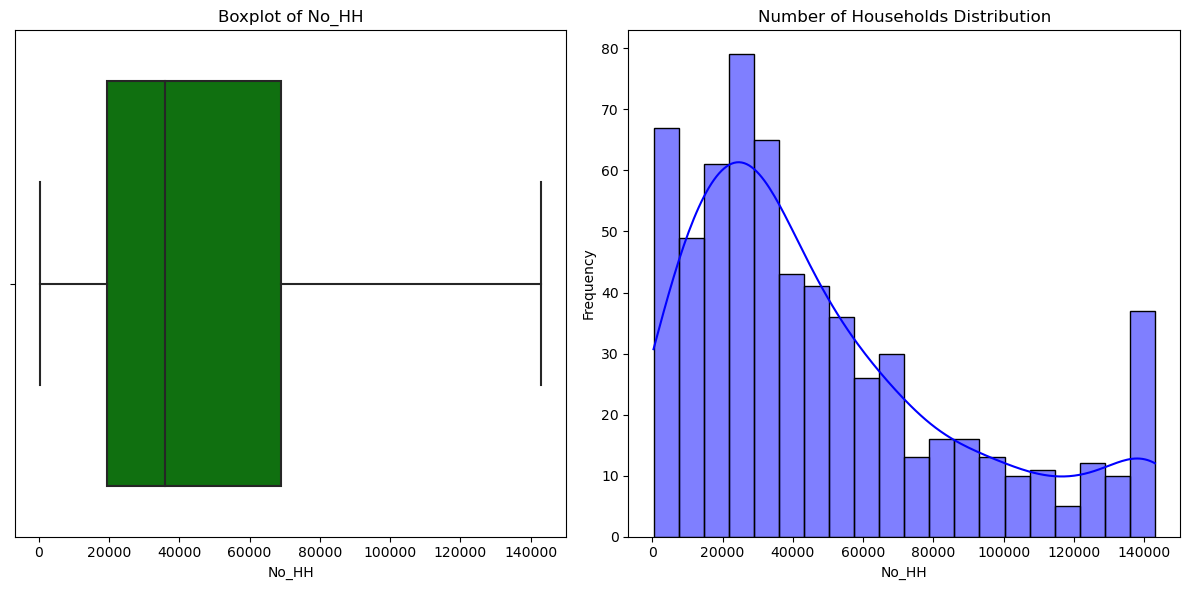

In [393]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df2_cleaned, x='No_HH', color='green', ax=display[0])
display[0].set_title('Boxplot of No_HH')
display[0].set_xlabel('No_HH')

sns.histplot(df2_cleaned['No_HH'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Number of Households Distribution')
display[1].set_xlabel('No_HH')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Outliers have been treated

## Scaling the data using the z-score method

In [399]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2_cleaned[numerical_cols])

## Visualize the data before and after scaling

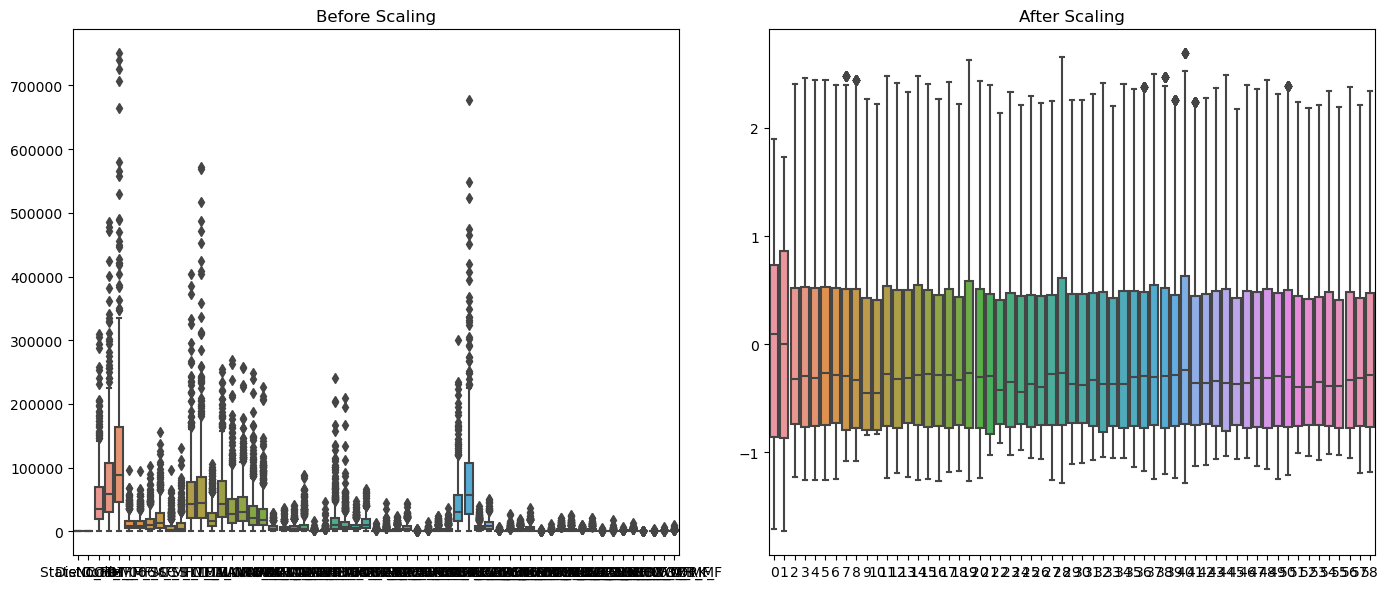

In [413]:
fig, axes = plt.subplots(1, 2,  figsize=(14, 6))
sns.boxplot(data=df2[numerical_cols], ax=axes[0])
axes[0].set_title('Before Scaling')
sns.boxplot(data=scaled_data, ax=axes[1])
axes[1].set_title('After Scaling')
plt.tight_layout()
plt.show()

## We should consider handling outliers before performing PCA because they can distort the results.

## By carefully handling outliers, we ensure that PCA gives a more accurate and meaningful representation of the data structure.

### Updating the dataframe with scaled values

In [421]:
df2_cleaned[numerical_cols] = scaled_data

In [485]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Code      640 non-null    float64
 1   Dist.Code       640 non-null    float64
 2   State           640 non-null    object 
 3   Area Name       640 non-null    object 
 4   No_HH           640 non-null    float64
 5   TOT_M           640 non-null    float64
 6   TOT_F           640 non-null    float64
 7   M_06            640 non-null    float64
 8   F_06            640 non-null    float64
 9   M_SC            640 non-null    float64
 10  F_SC            640 non-null    float64
 11  M_ST            640 non-null    float64
 12  F_ST            640 non-null    float64
 13  M_LIT           640 non-null    float64
 14  F_LIT           640 non-null    float64
 15  M_ILL           640 non-null    float64
 16  F_ILL           640 non-null    float64
 17  TOT_WORK_M      640 non-null    flo

In [487]:
from scipy.stats import zscore
df2_cleaned_scaled=df2_cleaned[numerical_cols].apply(zscore)
df2_cleaned_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.710782,-1.723934,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.710782,-1.718521,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.710782,-1.713109,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-1.710782,-1.707696,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


# Perform PCA

In [426]:
from sklearn.decomposition import PCA

### Creating the covariance matrix

In [489]:
cov_matrix = np.cov(df2_cleaned_scaled[numerical_cols], rowvar=False)

In [491]:
cov_matrix

array([[1.00156495, 0.99457535, 0.40338248, ..., 0.05909443, 0.12308779,
        0.2447105 ],
       [0.99457535, 1.00156495, 0.39634859, ..., 0.06808479, 0.11066561,
        0.22599926],
       [0.40338248, 0.39634859, 1.00156495, ..., 0.65276151, 0.76840117,
        0.79788409],
       ...,
       [0.05909443, 0.06808479, 0.65276151, ..., 1.00156495, 0.76249106,
        0.72075284],
       [0.12308779, 0.11066561, 0.76840117, ..., 0.76249106, 1.00156495,
        0.90224595],
       [0.2447105 , 0.22599926, 0.79788409, ..., 0.72075284, 0.90224595,
        1.00156495]])

In [ ]:
# Get eigenvalues and eigenvectors

In [493]:
pca = PCA()
pca.fit(df2_cleaned_scaled[numerical_cols])

PCA()

In [495]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [497]:
eigenvalues

array([3.57108475e+01, 7.98557733e+00, 4.50785903e+00, 2.77867519e+00,
       1.97472860e+00, 1.17776767e+00, 1.13039501e+00, 7.22103375e-01,
       4.64431676e-01, 3.46774532e-01, 3.05963732e-01, 2.68366978e-01,
       2.20811847e-01, 1.80278141e-01, 1.68296796e-01, 1.32409265e-01,
       1.29436740e-01, 1.03406138e-01, 9.55347371e-02, 8.58417456e-02,
       8.09066019e-02, 6.56476263e-02, 6.23708292e-02, 4.79008765e-02,
       4.56408231e-02, 4.38435424e-02, 3.10290046e-02, 2.86009130e-02,
       2.74987147e-02, 2.33916183e-02, 2.16432655e-02, 1.87723745e-02,
       1.56678899e-02, 1.40371782e-02, 1.18761437e-02, 1.11316049e-02,
       9.08077540e-03, 7.25913797e-03, 6.18691864e-03, 4.89879738e-03,
       4.55034891e-03, 4.24001897e-03, 3.26372660e-03, 2.18239672e-03,
       2.12902353e-03, 1.90742071e-03, 1.43490578e-03, 1.09833856e-03,
       9.62038195e-04, 8.56614567e-04, 6.51562449e-04, 5.76295579e-04,
       4.31846786e-04, 3.69015469e-04, 3.06582238e-04, 2.07171377e-04,
      

In [499]:
eigenvectors

array([[ 3.03688860e-02,  3.03440259e-02,  1.49578258e-01, ...,
         1.41068150e-01,  1.47433908e-01,  1.42143173e-01],
       [-1.72196615e-01, -1.69016895e-01, -1.19691823e-01, ...,
         4.13029333e-02, -3.75381832e-02, -3.86825793e-02],
       [ 3.01346957e-01,  3.06417948e-01,  6.82434200e-02, ...,
        -7.35067283e-02, -1.12204882e-01, -1.79425675e-02],
       ...,
       [ 1.13328651e-03, -9.20198117e-04,  8.13952594e-04, ...,
        -1.16253522e-02,  5.62399229e-02, -6.20621258e-03],
       [ 2.52804397e-03, -1.82690047e-03, -6.49442371e-05, ...,
         1.42236570e-02, -7.70492389e-02, -8.36657342e-04],
       [-2.13017946e-03,  1.60157621e-03, -4.00867509e-03, ...,
         2.09764678e-03,  5.52636585e-03,  1.52530297e-03]])

## Identify the optimum number of PCs (at least 90% explained variance)

In [502]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_pc_count = np.argmax(explained_variance_ratio >= 0.90) + 1

In [504]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.6  0.14 0.08 0.05 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


#### Obtaining the Cumulative Sum of the Expalained Variance 


In [662]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 60.43  73.95  81.57  86.28  89.62  91.61  93.52  94.75  95.53  96.12
  96.64  97.09  97.46  97.77  98.05  98.28  98.5   98.67  98.83  98.98
  99.12  99.23  99.33  99.41  99.49  99.57  99.62  99.67  99.71  99.75
  99.79  99.82  99.85  99.87  99.89  99.91  99.93  99.94  99.95  99.96
  99.96  99.97  99.98  99.98  99.98  99.99  99.99  99.99  99.99 100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


- We can see above that more than 90% of the variance is explained by 6 Principal Components.
- Around 93% of the variance is explained by 7 Principal Components. 
- Around 97% of the variance is explained by 12 Principal Components. 

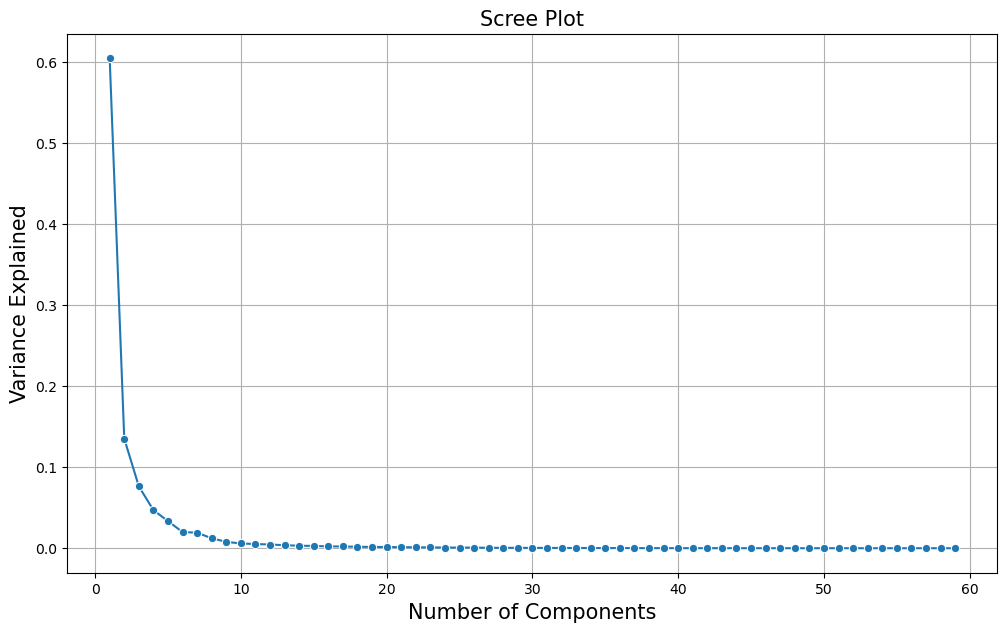

In [510]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 6 as the cumulative explained variance is around 90%

## Apply PCA for the number of decided components to get the loadings and component output

### Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot


In [533]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 59 to 6)
pca = PCA(n_components=6, random_state=123)
df2_pca = pca.fit_transform(df2_cleaned_scaled)
df2_pca.transpose().round(2) # Component output

array([[-5.63, -5.59, -7.57, ..., -7.77, -7.75, -7.3 ],
       [ 1.05,  0.58,  0.3 , ..., -1.62, -1.61, -2.01],
       [-2.12, -2.69, -1.13, ...,  0.31,  0.34,  0.25],
       [-1.28, -1.76,  0.03, ..., -1.3 , -0.84, -0.74],
       [ 0.16, -0.1 ,  0.13, ...,  0.84,  0.61,  0.76],
       [-1.05,  0.54, -0.77, ...,  1.3 ,  0.94,  0.8 ]])

In [535]:
df2_pca.shape

(640, 6)

In [537]:
pca.components_.round(2)

array([[ 0.03,  0.03,  0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,
         0.02,  0.02,  0.16,  0.15,  0.15,  0.16,  0.15,  0.14,  0.14,
         0.13,  0.11,  0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,
         0.16,  0.15,  0.09,  0.06,  0.13,  0.12,  0.14,  0.14,  0.15,
         0.15,  0.16,  0.16,  0.16,  0.15,  0.09,  0.07,  0.13,  0.11,
         0.14,  0.14,  0.15,  0.15,  0.14,  0.13,  0.06,  0.06,  0.12,
         0.11,  0.14,  0.14,  0.15,  0.14],
       [-0.17, -0.17, -0.12, -0.07, -0.09, -0.01, -0.  , -0.07, -0.08,
         0.04,  0.03, -0.1 , -0.13,  0.  , -0.02, -0.11, -0.09, -0.16,
        -0.16,  0.05,  0.08, -0.07, -0.1 , -0.08, -0.11, -0.19, -0.21,
         0.08,  0.1 ,  0.27,  0.27,  0.15,  0.11,  0.05,  0.01, -0.06,
        -0.08, -0.03, -0.08,  0.07,  0.08,  0.26,  0.26,  0.14,  0.09,
         0.05,  0.  , -0.06, -0.09,  0.14,  0.16,  0.29,  0.29,  0.18,
         0.16,  0.06,  0.04, -0.04, -0.04],
       [ 0.3 ,  0.31,  0.07, -0.06,  0.  , -0.08, -0.07, -0.

In [539]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

### Check the explained variance for each PC. 


In [542]:
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
# It gives the Eigen Values when PC's are kept at 6
pca.explained_variance_ratio_.round(2)

array([0.6 , 0.14, 0.08, 0.05, 0.03, 0.02])

### Component loading when PC's are kept as 6


In [582]:
df2_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df2_cleaned_scaled))
df2_pca_loading.shape

(6, 59)

In [584]:
df2_pca_loading.head(6)

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.03,0.03,0.15,0.16,0.16,0.16,0.16,0.14,0.14,0.02,...,0.14,0.13,0.06,0.06,0.12,0.11,0.14,0.14,0.15,0.14
1,-0.17,-0.17,-0.12,-0.07,-0.09,-0.01,-0.00,-0.07,-0.08,0.04,...,0.14,0.16,0.29,0.29,0.18,0.16,0.06,0.04,-0.04,-0.04
2,0.30,0.31,0.07,-0.06,0.00,-0.08,-0.07,-0.07,-0.02,0.31,...,-0.06,0.07,-0.06,-0.03,0.05,0.18,-0.11,-0.07,-0.11,-0.02
3,0.00,-0.02,0.08,0.05,0.07,0.03,0.02,0.01,0.02,0.10,...,-0.02,0.01,0.21,0.24,-0.24,-0.19,-0.17,-0.17,0.02,0.06
4,0.15,0.13,-0.03,-0.05,-0.03,-0.08,-0.07,-0.18,-0.17,0.33,...,0.11,0.11,0.02,-0.01,0.01,0.02,0.04,0.08,0.20,0.25
5,0.25,0.24,-0.03,-0.11,-0.07,-0.14,-0.13,-0.08,-0.04,-0.13,...,-0.08,-0.07,0.05,0.05,-0.13,-0.13,0.13,0.28,-0.03,0.02


In [598]:
# Calculate the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numerical_cols)
loadings.head(6)


,PC1,PC2,PC3,PC4,PC5,PC6
State Code,0.030369,-0.172197,0.301347,0.000705,0.150191,0.247414
Dist.Code,0.030344,-0.169017,0.306418,-0.021726,0.134957,0.244014
No_HH,0.149578,-0.119692,0.068243,0.079420,-0.027566,-0.030231
TOT_M,0.159043,-0.070203,-0.059847,0.053010,-0.046639,-0.109570
TOT_F,0.158310,-0.090756,0.002988,0.071231,-0.032287,-0.073524
M_06,0.155991,-0.008429,-0.083250,0.027788,-0.077506,-0.139006


In [565]:
first_pc_equation = ' + '.join([f'{coef:.3f} * {name}' for coef, name in zip(pca.components_[0], numerical_cols)])

In [561]:
first_pc_equation

'0.030 * State Code + 0.030 * Dist.Code + 0.150 * No_HH + 0.159 * TOT_M + 0.158 * TOT_F + 0.156 * M_06 + 0.156 * F_06 + 0.143 * M_SC + 0.143 * F_SC + 0.019 * M_ST + 0.018 * F_ST + 0.155 * M_LIT + 0.146 * F_LIT + 0.154 * M_ILL + 0.158 * F_ILL + 0.154 * TOT_WORK_M + 0.143 * TOT_WORK_F + 0.142 * MAINWORK_M + 0.126 * MAINWORK_F + 0.111 * MAIN_CL_M + 0.083 * MAIN_CL_F + 0.120 * MAIN_AL_M + 0.091 * MAIN_AL_F + 0.142 * MAIN_HH_M + 0.134 * MAIN_HH_F + 0.123 * MAIN_OT_M + 0.117 * MAIN_OT_F + 0.156 * MARGWORK_M + 0.149 * MARGWORK_F + 0.087 * MARG_CL_M + 0.064 * MARG_CL_F + 0.127 * MARG_AL_M + 0.116 * MARG_AL_F + 0.145 * MARG_HH_M + 0.142 * MARG_HH_F + 0.151 * MARG_OT_M + 0.148 * MARG_OT_F + 0.158 * MARGWORK_3_6_M + 0.156 * MARGWORK_3_6_F + 0.157 * MARG_CL_3_6_M + 0.149 * MARG_CL_3_6_F + 0.094 * MARG_AL_3_6_M + 0.066 * MARG_AL_3_6_F + 0.128 * MARG_HH_3_6_M + 0.114 * MARG_HH_3_6_F + 0.145 * MARG_OT_3_6_M + 0.141 * MARG_OT_3_6_F + 0.151 * MARGWORK_0_3_M + 0.148 * MARGWORK_0_3_F + 0.142 * MARG_CL_0_